In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

import pandas as pd
import numpy as np
import math
import scipy
import re

In [22]:
with open('sentences.txt', 'r') as f:
    read_data = []
    for line in f:
        read_data.append(line.lower())  
f.closed

True

In [69]:
token  = [re.split('[^a-z]', t) for t in read_data]

In [126]:
token2 = []
dictionary = {}
for i in token:
    tt = []
    for j in i:
        if j: 
            tt.append(j)
            if j in dictionary: " "
            else: dictionary[j] = len(dictionary)
    token2.append(tt)

In [134]:
matrix = np.zeros((len(token2), len(dictionary)))
for i in range(len(token2)):
    for j in range(len(token2[i])):
        key = token2[i][j]
        matrix[i][dictionary[key]]+=1

In [190]:
dest = np.zeros(len(token2))
for i in range(1,len(token2)):
    dest[i] = scipy.spatial.distance.cosine(matrix[0,:], matrix[i,:])

In [191]:
#answer
dest.argsort()

array([ 0,  6,  4, 21, 10, 12, 16, 20,  2, 13, 14, 11,  8, 19,  3,  9,  7,
        5, 15, 18,  1, 17])

In [192]:
dest

array([0.        , 0.95275444, 0.86447381, 0.89517152, 0.77708871,
       0.94023857, 0.73273876, 0.92587507, 0.88427249, 0.90550888,
       0.83281654, 0.88047714, 0.83964325, 0.87035926, 0.87401184,
       0.94427218, 0.84063619, 0.9566445 , 0.94427218, 0.88854436,
       0.84275727, 0.82503645])

In [187]:
#f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2) [1,15]

def f(x):
    return np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)

x_dot = np.arange(1,30,0.1)
x = [1,4,10,15]
b = [f(x) for x in x] 
y =  np.sin(x_dot / 5.0) * np.exp(x_dot / 10.0) + 5 * np.exp(-x_dot / 2.0)
A = np.zeros((4,4))
A[:,0] = 1
for i in range(4):
    for j in range(1,4):
        A[i,j] = x[i]**j

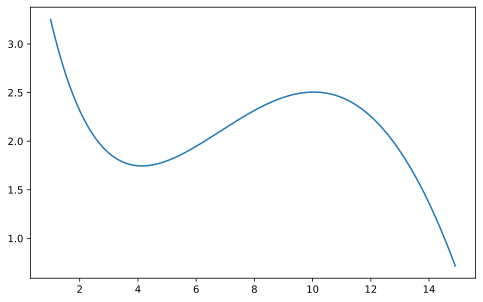

In [188]:
plt.plot(x_dot,y)
plt.show()

In [189]:
print(scipy.linalg.solve(A[:2,:2],b[:2]))
print(scipy.linalg.solve(A[:3,:3],b[:3]))
print(scipy.linalg.solve(A,b))

[ 3.75400717 -0.50179031]
[ 4.03321549 -0.8508007   0.06980208]
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


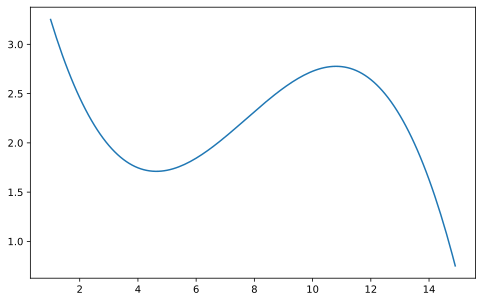

In [182]:
#y1 = 3.75400717 - -0.50179031*x_dot
#y2 = 4.12207652 - 0.96187699*x_dot + 0.09201734*x_dot**2
y3 = 4.41187544 -1.3603505*x_dot + 0.20974815*x_dot**2 -0.00905622*x_dot**3
plt.plot(x_dot,y3)
plt.show()

In [16]:
#minimize Gradient descent
fun = lambda x: np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)
res = scipy.optimize.minimize(fun, 30, method='BFGS')
res.fun

-11.898894665981285

In [18]:
#minimize evolution
res = scipy.optimize.differential_evolution(fun,[(1, 30)])
res.fun

array([-11.89889467])

In [21]:
#minimize not smooth fun h(x) = int(f(x))

fun2 = lambda x: int(np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0))
res = scipy.optimize.minimize(fun2, 30, method='BFGS')
print(res.fun)
res2 = scipy.optimize.differential_evolution(fun2,[(1, 30)])
print(res2.fun)

-5
-11.0


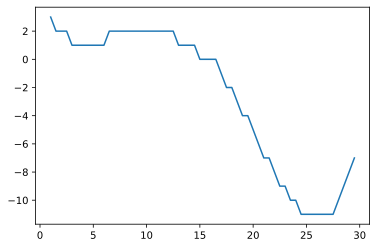

In [28]:
x_dot = np.arange(1,30,0.5)
y  = list(map(fun2,x_dot))
plt.plot(x_dot,y)
plt.show()